# Package loading

In [1]:
import numpy as np
import pandas as pd
import os
import shapely
from shapely.geometry.point import Point
from shapely.geometry import Polygon, LineString, Point
import dxfgrabber as dxfgb
import matplotlib.pyplot as plt
import math

In [2]:
from dxfreader import DxfParser

# Sub features

In [3]:
def plot_dxf(dxfdetails):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    for closedsection in dxfdetails['closed_patterns']:
        poly = Polygon(closedsection)
        x, y = poly.exterior.xy
        plt.plot(x, y, color='g', alpha=0.5)
    
    for opensection in dxfdetails['open_patterns']:
        lines = LineString(opensection)
        x, y = lines.xy
        plt.plot(x, y, color='y', alpha=1)
    
    for bendlines, tangents in zip(dxfdetails['bend_line'], dxfdetails['tangents_coords']):
        lines = LineString(bendlines)
        color = (np.random.rand(),np.random.rand(),np.random.rand())
        x, y = lines.xy
        plt.plot(x, y, color=color)
        for tangent in tangents:
            lines = LineString(tangent)
            x, y = lines.xy
            plt.plot(x, y, color=color)
    
    centeraxis = dxfdetails['bend_center']
    for center, angle, direction, radius in zip(centeraxis,
                                               dxfdetails['bend_angle'],
                                               dxfdetails['bend_direction'],
                                               dxfdetails['bend_radius']):
        ax.text(center[0], center[1], '{} - {} - {}'.format(angle, direction, radius), color='c')
        
    
    poly = Polygon(dxfdetails['minimum_rectangle_coords'])
    x, y = poly.exterior.xy
    plt.plot(x, y, color='r')
    
    poly = Polygon(dxfdetails['convex_hull_coords'])
    x, y = poly.exterior.xy
    plt.plot(x, y, color='b')
    
    ax.set_aspect('equal')
    #ax.set_xlim([345,355])
    #ax.set_ylim([95,105])
    plt.show()
    
#plot_dxf(details)

# Package documentation

http://dxfgrabber.readthedocs.io/en/latest/  
https://shapely.readthedocs.io/en/latest/

# DXF loading

In [4]:
#List of all the dixs in the folder
dxffolder = '../Y2 - Sample DXF'
dxflist = [os.path.join(dxffolder, file) for file in os.listdir(dxffolder) if file.endswith('.dxf')]
for index, path in enumerate(dxflist):
    #print('{:02d} --> '.format(index), path.split('/')[-1])
    pass

In [5]:
dxflist[3].split('/')[-1][1:3]

'36'

In [6]:
dxf = dxfgb.readfile(dxflist[34])
print(dxf.dxfversion)
validentities = ['LINE', 'ARC', 'ELLIPSE', 'CIRCLE', 'SPLINE']
#for element in [element for element in dxf.modelspace()]: #   if element.dxftype == 'MTEXT'
#for element in [element for element in dxf.modelspace() if element.dxftype == 'MTEXT']: #
for element in [element for element in dxf.modelspace()]: #
#for element in [element for element in dxf.modelspace() if element.linetype == 'PHANTOM']:
    #print(np.round(x.start,3))
    print(element)
    print(element.color)
    #print(element.dxftype)
    try:
        print(element.text, '-',  element.insert, element.align_point, element.halign)
    except:
        pass
    try:
        print(element.points)
        print(element.is_closed)
    except:
        pass
    try:
        print(element.plain_text(split=False))
        #for line in element.plain_text(split=False).split('\n'):
        #    print(line.split(':'))
        #    print()
        #print(element.lines())
        #print(element.insert)
    except:
        pass
    #print(element.linetype)
    #
    #print(element.insert)
    #print(element.center, element.major_axis, element.ratio, element.start_param, element.end_param)
    #print(np.round(element.control_points, 3)[:,0:2])
    print()

IndexError: list index out of range

# DXF reading module

In [ ]:
from dxfreader import DxfParser

fileid = 2

dxfparser = DxfParser(min_edge_length=1, roundigexp=2)
print(dxflist[fileid])
details = dxfparser.parse(dxflist[fileid])
details.keys()
#details['closed_patterns']
#details['total_surface']

In [ ]:
details['open_patterns']

# Plot a DXF

In [ ]:
plot_dxf(details)

# Dataset creation

OK -  0  -  l1615440_flat1
13


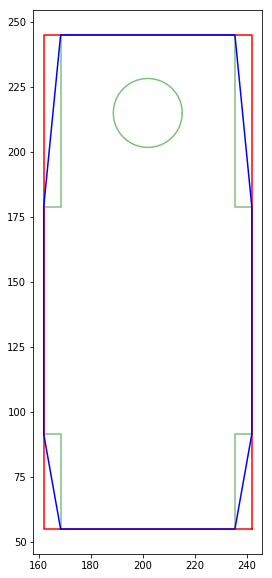

OK -  1  -  l3045070_flat1
11


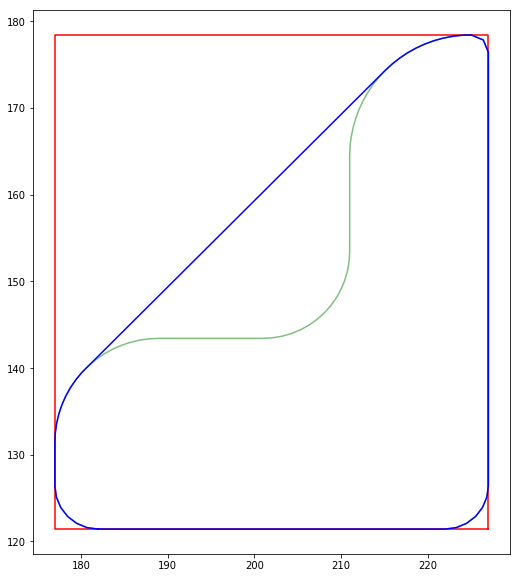

OK -  2  -  l3600210_flat1
12


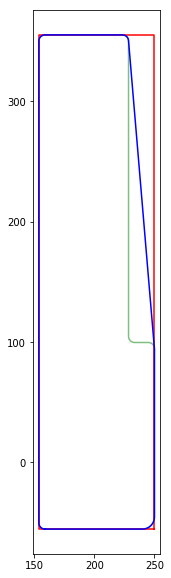

OK -  3  -  l3605790_flat1
95


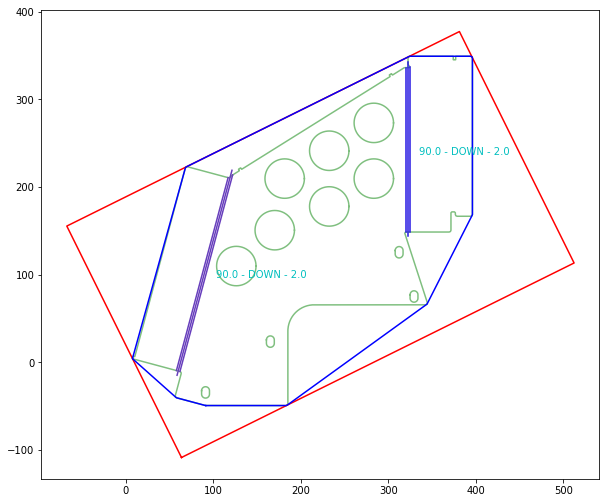

OK -  4  -  l6016360_flat1
463


/Users/cricket/Documents/ONline classes/A8 - veille thematique/sheet-metal-cost-calculator/Y1 - Notebooks/dxfreader.py:134: RuntimeWarning: invalid value encountered in less
  mask = np.array(distances)<limit_distance
/Users/cricket/Documents/ONline classes/A8 - veille thematique/sheet-metal-cost-calculator/Y1 - Notebooks/dxfreader.py:151: RuntimeWarning: Mean of empty slice.
  self.details['deformation_length'] = [np.array(np.array([LineString(coord).length for coord in tangentset]).mean()).sum() for tangentset in self.details['tangents_coords']]
/Users/cricket/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


NOK


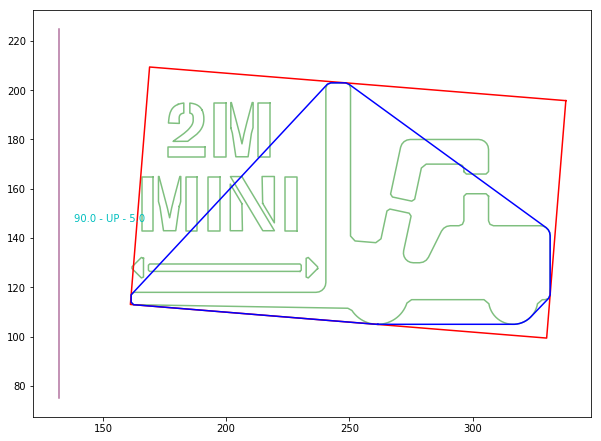

OK -  5  -  l7053370_flat1
167
NOK
NOK
NOK
NOK
NOK


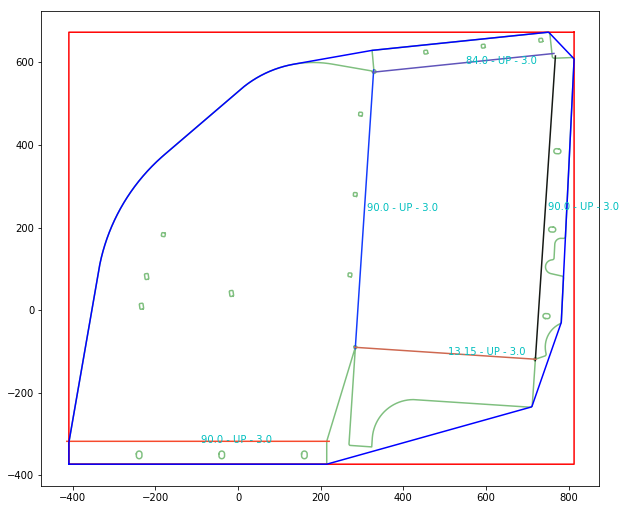

OK -  6  -  l7080410_flat1
26
NOK -  6  -  l7080410_flat1
OK -  7  -  l8406000_flat1
12


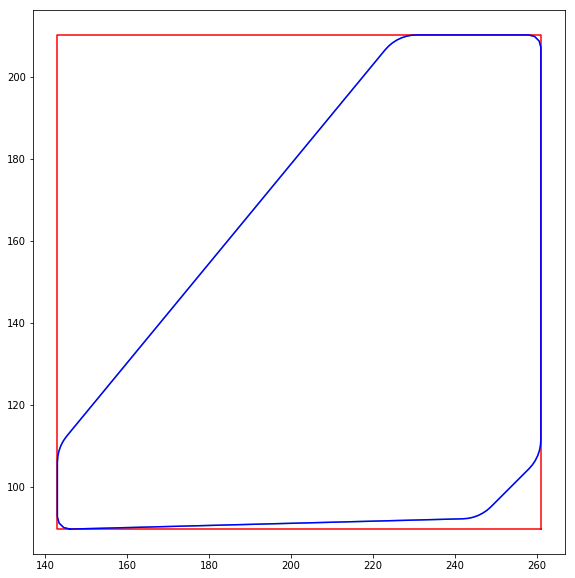

OK -  8  -  l8841850_flat1
30


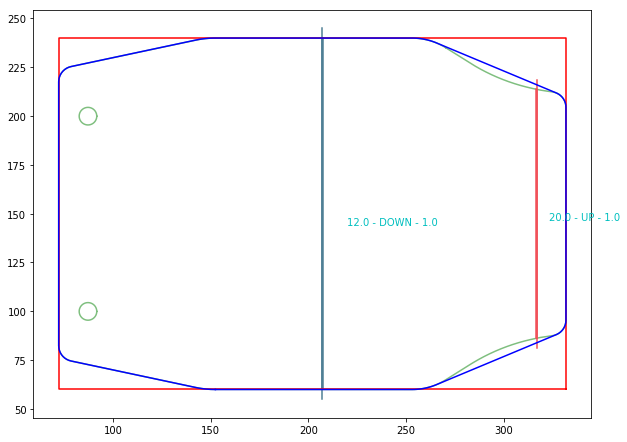

,cut_length,num_closed_patterns,num_open_patterns,total_area,minimum_rectangle_area,minimum_rectangle_dim1,minimum_rectangle_dim2,convex_hull_area,no_hole_area,thickness,...,bend_direction,deformation_length,possible_imperfection,bend_bend_distance,bend_bend_angle,merged_bend,punch_length,bend_edge_distance,bend_edge_angle,bend_edge_length
l1615440_flat1,623.217156,2,0,13316.861156,1.520000e+04,190.000000,80.000000,1.453375e+04,13867.500000,5.0,...,[],[],NaN,[],[],[],[],[],[],[]
l3045070_flat1,193.252913,1,0,1596.002373,2.850000e+03,57.000000,50.000000,1.943015e+03,1596.002373,40.0,...,[],[],NaN,[],[],[],[],[],[],[]
l3600210_flat1,997.857357,1,0,33876.354174,3.940800e+04,410.500000,96.000000,3.651548e+04,33876.354174,NaN,...,[],[],NaN,[],[],[],[],[],[],[]
l3605790_flat1,2602.369091,12,0,74589.140441,1.474864e+05,500.202718,294.853341,1.046232e+05,86100.260305,2.0,...,"[DOWN, DOWN]","[230.1166351040639, 188.17697242030002]",NaN,"[[271.62632384673293], [271.62632384673293]]","[[-15.000035848853514], [15.000035848853514]]","[0, 0]","[242.25363155379117, 198.67700000000002]","[[11.249270776365906, 241.1529805849391, 274.4...","[[43.00027089519513, 74.99996415114649, 15.000...","[[199.6000397845652, 49.400000000000034, 178.6..."
l6016360_flat1,1634.834408,19,0,2046.971017,1.637716e+04,169.445812,96.651319,1.027634e+04,4061.998891,NaN,...,[UP],[nan],NaN,[],[],[],[150.0],"[[199.45899999999997, 143.24299999999994, 30.4...","[[0.0, 90.0, 90.95018563319393, 90.0, 0.0, 0.0]]","[[23.999999999999986, 29.383000000000038, 86.9..."
l7053370_flat1,5279.150503,17,0,964662.555560,1.278977e+06,1223.014426,1045.757717,1.010958e+06,966710.057053,NaN,...,"[UP, UP, UP, UP, UP]","[nan, nan, nan, nan, nan]","[((281.083, -88.06), (716.926, -116.88)), ((71...","[[437.9425927677998, 427.87939705267536, 399.8...","[[2.0086250174244924e-07, 80.31703809865675, 8...","[0, 0, 0, 0, 0]","[676.3496791342479, 738.9015092913262, 440.653...","[[0.9038877142654628, 237.5883990770593, 288.0...","[[13.146910000720467, 3.7765398196819717, 86.2...","[[231.09048282004176, 52.34300000000002, 624.2..."
l7080410_flat1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l8406000_flat1,408.232512,1,0,9757.772271,1.423269e+04,120.616000,118.000000,9.757772e+03,9757.772271,NaN,...,[],[],NaN,[],[],[],[],[],[],[]
l8841850_flat1,853.672316,3,0,42893.098211,4.676886e+04,259.827000,180.000000,4.335755e+04,43020.130938,1.0,...,"[DOWN, UP]","[180.0, 127.4077944612]",NaN,"[[103.69358595531571], [103.69358595531571]]","[[0.0], [0.0]]","[0, 0]","[190.0, 137.544]","[[124.79299999999996, 0.13999999999998636, 0.1...","[[0.0, 90.0, 90.0, 101.99980111161427, 0.0, 78...","[[108.998, 45.900000000000006, 54.640000000000..."


In [7]:
#List of all the dixs in the folder
dxffolder = '../Y2 - Sample DXF'
dxflist = [os.path.join(dxffolder, file) for file in os.listdir(dxffolder) if file.endswith('.dxf')]

columns = ['cut_length', 'num_closed_patterns', 'num_open_patterns', 'total_area', 'minimum_rectangle_area', 'minimum_rectangle_dim1', 'minimum_rectangle_dim2',
           'convex_hull_area', 'no_hole_area', 'thickness', 'unit', 'material', 'radius', 'bend_radius',
           'bend_angle', 'bend_direction', 'deformation_length', 'possible_imperfection', 'bend_bend_distance',
           'bend_bend_angle', 'merged_bend', 'punch_length',
           'bend_edge_distance', 'bend_edge_angle', 'bend_edge_length']

dataset = pd.DataFrame(columns = columns)
from dxfreader import DxfParser
dxfparser = DxfParser(min_edge_length=1, roundigexp=3)
for index, dxffile in enumerate(dxflist[:]):
    name = dxffile.split('/')[-1]
    name = name.split('.')[0]


    try:
        print('OK - ', index, ' - ', name)
        details = dxfparser.parse(dxffile)
        plot_dxf(details)
    except:
        print('NOK - ', index, ' - ', name)
        details = {}
    dataset.loc[name] = [details.get(x, np.nan) for x in dataset.columns]
dataset.to_csv('../B1 - Reports/Z1 - dataset.csv')
dataset#.reset_index()

In [17]:
mask = dataset['num_closed_patterns'].isna()
print('DXF errors remaining :', dataset[mask].shape[0])

DXF errors remaining : 11


In [8]:
dataset['thickness']

l1615440_flat1     5.0
l3045070_flat1    40.0
l3600210_flat1     NaN
l3605790_flat1     2.0
l6016360_flat1     NaN
l7053370_flat1     NaN
l7080410_flat1     NaN
l8406000_flat1     NaN
l8841850_flat1     1.0
Name: thickness, dtype: float64

To add in the dataset:
- DONE + rectangle area
- DONE + rectangle dimension (height and width)
- DONE + Main area (no holes)
- DONE + convex hull area (no holes)
- DONE + Add the forgivness parameter
- bends:
    - DONE + Radius
    - DONE + Placement relative to outside edges (Min length, number, distance)
    - DONE + placement relative to other bends (Distance, Angle)
    - NOT NEEDED + Extend version of the bend lines
    - DONE + Punch length
    - DONE + Angle
    - DONE + Direction
    - DONE + Length of deformation
- DONE + Number of open loops
- DONE + Number of closed loops
- DONE + Cut Length
- DONE + Thickness
- DONE + Material grade